# Malaria Parasite Detection from Parasitized RBC Using CNN

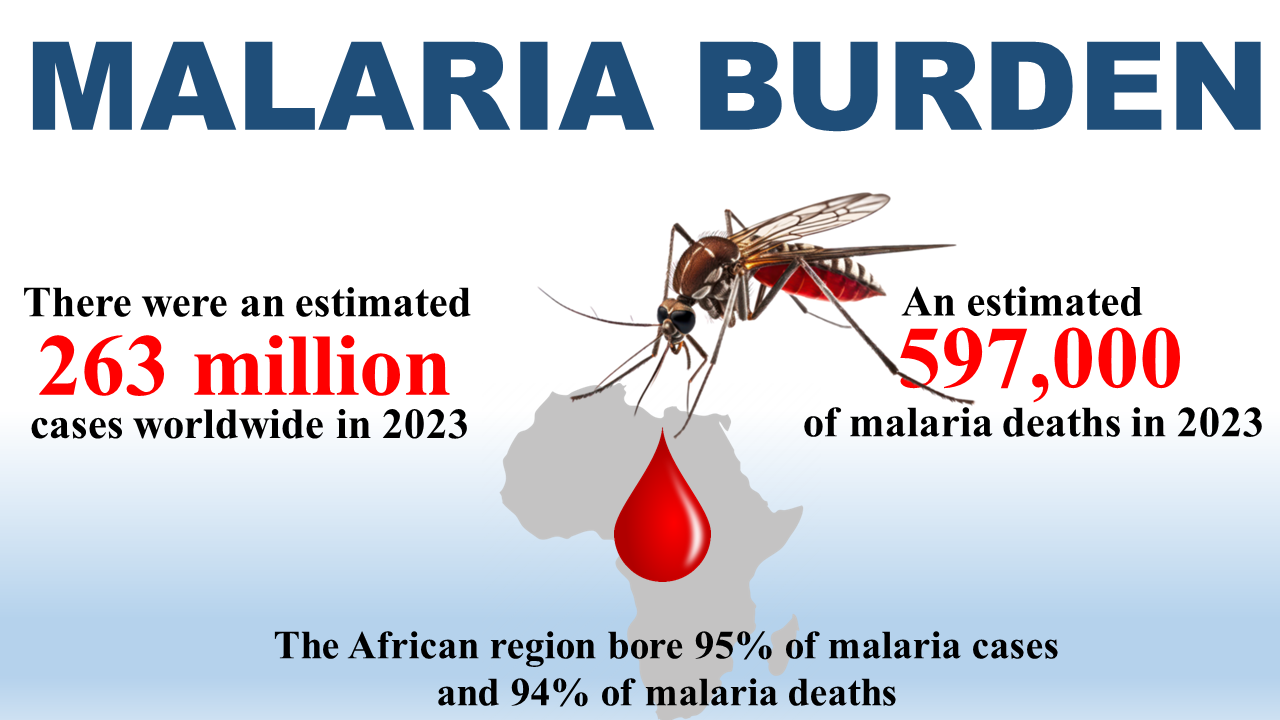

In [2]:
#import liraries and packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.16.1


In [3]:
#Set input image dimension
img_width = 64
img_height = 64

In [5]:
#data generator configuration
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [6]:
#training data set
train_data_generator = datagen.flow_from_directory(directory='./cells_seg',
                                                   target_size=(img_width, img_height),
                                                   class_mode='binary',  # Updated class_mode
                                                   batch_size=64,
                                                   subset='training'
                                                   )

Found 12048 images belonging to 2 classes.


In [7]:
#check the train label
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
#validation data set
validation_data_generator = datagen.flow_from_directory(directory='./cells_seg',
                                                        target_size=(img_width, img_height),
                                                        class_mode='binary',  # Updated class_mode
                                                        batch_size=64,
                                                        subset='validation'
                                                        )

Found 3011 images belonging to 2 classes.


### Model architecture

In [46]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [49]:
#fit the model
history = model.fit(train_data_generator,
                    epochs=25,
                    validation_data=validation_data_generator)

Epoch 1/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5982 - loss: 0.6562 - val_accuracy: 0.6373 - val_loss: 0.6251
Epoch 2/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7711 - loss: 0.4552 - val_accuracy: 0.7107 - val_loss: 0.5542
Epoch 3/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8540 - loss: 0.3214 - val_accuracy: 0.8808 - val_loss: 0.2922
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9378 - loss: 0.1713 - val_accuracy: 0.9319 - val_loss: 0.1641
Epoch 5/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9574 - loss: 0.1251 - val_accuracy: 0.9578 - val_loss: 0.1072
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9700 - loss: 0.0883 - val_accuracy: 0.9621 - val_loss: 0.1015
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9737 - loss: 0.0820 - val_accuracy: 0.9508 - val_loss: 0.1273
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9779 - loss: 0.0697 - val_accu

In [62]:
#Define and plot the learning curve parameters

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.ylim(0, 1)
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.savefig("CNN_3layer_model_accuracy.png")
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.savefig("CNN_3layer_model_loss.png")
  plt.show()

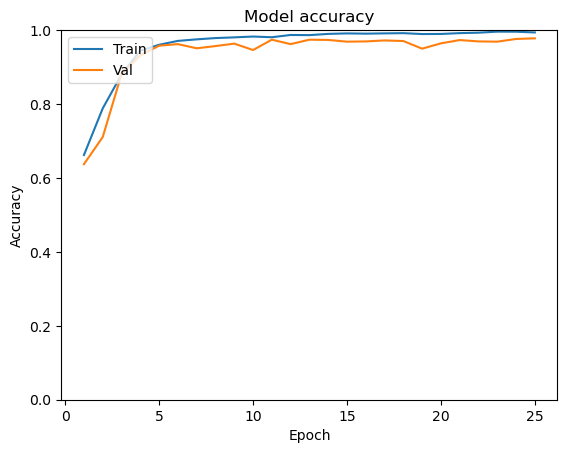

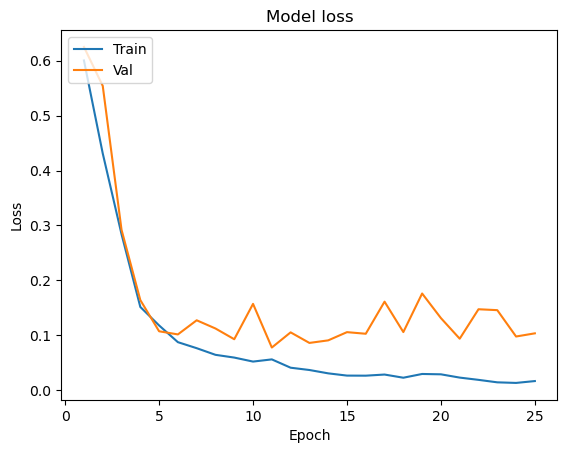

In [63]:
#plot the learning curve (the number after the history in the number of epochs)

plot_learningCurve(history, 25)

## Test_data

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Create an ImageDataGenerator for test data
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Set the path to your test data directory
test_data_dir = './test_data'

# Set the image dimensions
img_width, img_height = 64, 64

# Generate batches of test data
test_data_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

# Get the true labels for the test data
test_true_labels = test_data_generator.classes

# Make predictions on the test data using the model
test_predictions = model.predict(test_data_generator)
test_predictions = test_predictions > 0.5  # Convert probabilities to binary predictions

# Calculate the precision score
precision = precision_score(test_true_labels, test_predictions)

# Calculate the recall score
recall = recall_score(test_true_labels, test_predictions)

# Calculate the accuracy score
accuracy = accuracy_score(test_true_labels, test_predictions)

# Calculate the F1 score
f1 = f1_score(test_true_labels, test_predictions)

# Calculate the confusion matrix
cm = confusion_matrix(test_true_labels, test_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Found 4000 images belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Precision: 0.991044776119403
Recall: 0.996
Accuracy: 0.9935
F1 Score: 0.9935162094763091


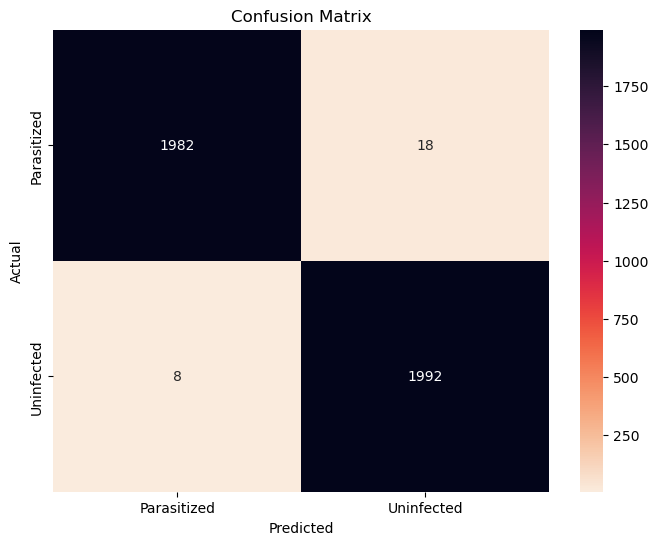

In [57]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'], cmap='rocket_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("CNN_confusion_matrix_test.png")
plt.show()

## Train data

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Create an ImageDataGenerator for test data
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Set the path to your test data directory
test_data_dir = './cells_seg'

# Set the image dimensions
img_width, img_height = 64, 64

# Generate batches of test data
test_data_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

# Get the true labels for the test data
test_true_labels = test_data_generator.classes

# Make predictions on the test data using the model
test_predictions = model.predict(test_data_generator)
test_predictions = test_predictions > 0.5  # Convert probabilities to binary predictions

# Calculate the precision score
precision = precision_score(test_true_labels, test_predictions)

# Calculate the recall score
recall = recall_score(test_true_labels, test_predictions)

# Calculate the accuracy score
accuracy = accuracy_score(test_true_labels, test_predictions)

# Calculate the F1 score
f1 = f1_score(test_true_labels, test_predictions)

# Calculate the confusion matrix
cm = confusion_matrix(test_true_labels, test_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Found 15059 images belonging to 2 classes.
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step
Precision: 0.9936432260627731
Recall: 0.9965466861468987
Accuracy: 0.995085995085995
F1 Score: 0.9950928381962865


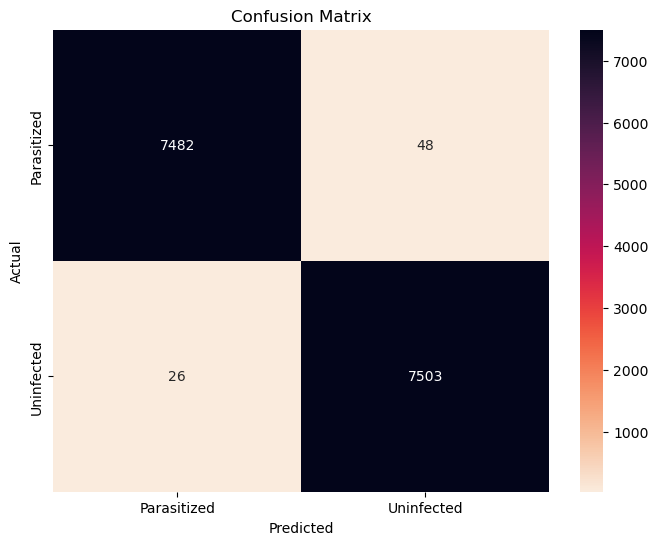

In [61]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'], cmap='rocket_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("CNN_confusion_matrix_train.png")
plt.show()

## Make Prediction
Using the test-set

In [64]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./malaria-dataset/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_88.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Print the shape of the prediction array
print('Shape of prediction:', prediction.shape)

# Interpret the prediction
if (prediction[0][0] >= 0.5).all():
    print("The image is predicted as uninfected")
else:
    print("The image is predicted as parasitized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shape of prediction: (1, 1)
The image is predicted as parasitized


## Make prediction

In [67]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./test_data/test_parasitized/imageqd97.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Print the shape of the prediction array
print('Shape of prediction:', prediction.shape)

# Interpret the prediction
if (prediction[0][0] >= 0.5).all():
    print("The image is predicted as uninfected")
else:
    print("The image is predicted as parasitized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Shape of prediction: (1, 1)
The image is predicted as parasitized


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


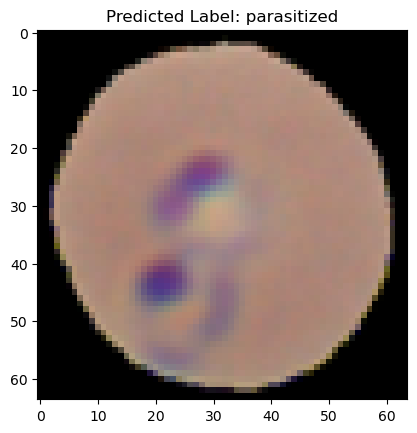

In [69]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./test_data/test_parasitized/imageqd97.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    label = "uninfected"
else:
    label = "parasitized"

# Display the image
plt.imshow(test_image[0])
plt.title("Predicted Label: " + label)
plt.axis("on")
plt.savefig("predicted_pos3.png")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


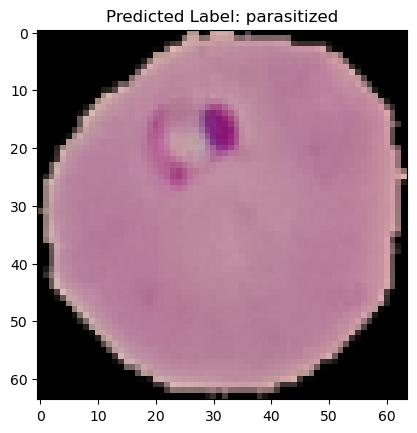

In [73]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./test_data/test_parasitized/imageqd124.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    label = "uninfected"
else:
    label = "parasitized"

# Display the image
plt.imshow(test_image[0])
plt.title("Predicted Label: " + label)
plt.axis("on")
plt.savefig("predicted_pos4.png")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


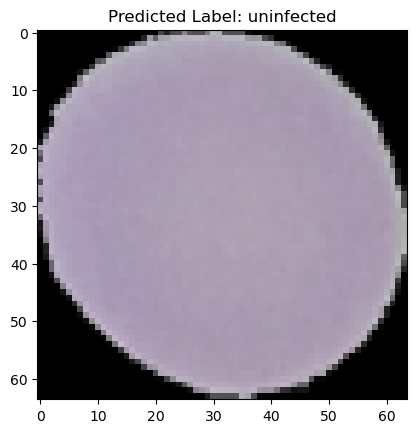

In [74]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./test_data/test_uninfected/imageqd1732.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    label = "uninfected"
else:
    label = "parasitized"

# Display the image
plt.imshow(test_image[0])
plt.title("Predicted Label: " + label)
plt.axis("on")
plt.savefig("predicted_neg3.png")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


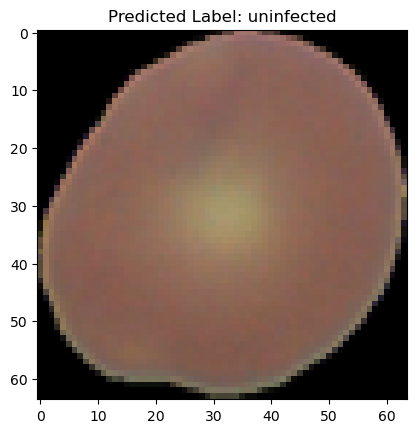

In [75]:
from PIL import Image
import numpy as np

# Load the test image
test_image = Image.open("./test_data/test_uninfected/imageqd1693.png")

# Preprocess the test image
test_image = test_image.resize((img_width, img_height))
test_image = np.array(test_image) / 255.0  # Normalize the pixel values
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(test_image)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    label = "uninfected"
else:
    label = "parasitized"

# Display the image
plt.imshow(test_image[0])
plt.title("Predicted Label: " + label)
plt.axis("on")
plt.savefig("predicted_neg4.png")
plt.show()